In [28]:
import numpy as np
import scipy as sp
import scipy.linalg as ln
import matplotlib.pyplot as plt

# **Direct Methods for the solution of Linear Systems**

**Esercizio 1**
Given a matrix A ∈ R
n×n and the vector xtrue = (1, 1, . . . , 1)T ∈ R
n, write a script that:

• Computes the right-hand side of the linear system b = Axtrue.

• Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use
the ∞-norm instead of the 2-norm?

• Solves the linear system Ax = b with the function np.linalg.solve().

• Computes the relative error between the solution computed before and the true solution xtrue.
Remember that the relative error between xtrue and x in R
n can be computed as

E(xtrue, x) = ||x − xtrue||2
||xtrue||2

• Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new
window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n.


In [29]:
n = 10

A = np.random.randn(n,n)

#print("A:",A)

xtrue = np.ones(n)

#print("xtrue:", xtrue)

b = np.dot(A,xtrue)

#print("b:",b)

cond2 = np.linalg.cond(A,2)

print("Condition number using norm-2: ",cond2)

print()
if(cond2 < 1000000):
  print("A isn't ill-conditioned because condition number is lower than 10^5")
else:
  print("A is ill-conditioned because condition number is greater than 10^5")
print()

cond_inf = np.linalg.cond(A,np.inf)

print("Condition number using norm-inf: ",cond_inf)

x = np.linalg.solve(A,b)

#print("x: ",x)

absolute_err = np.linalg.norm(xtrue - x, 2)
relative_err = absolute_err / np.linalg.norm(xtrue, 2)

print("Relative error: ",relative_err)


Condition number using norm-2:  11.875417419594974

A isn't ill-conditioned because condition number is lower than 10^5

Condition number using norm-inf:  39.13509365943005
Relative error:  1.0614103731680586e-15


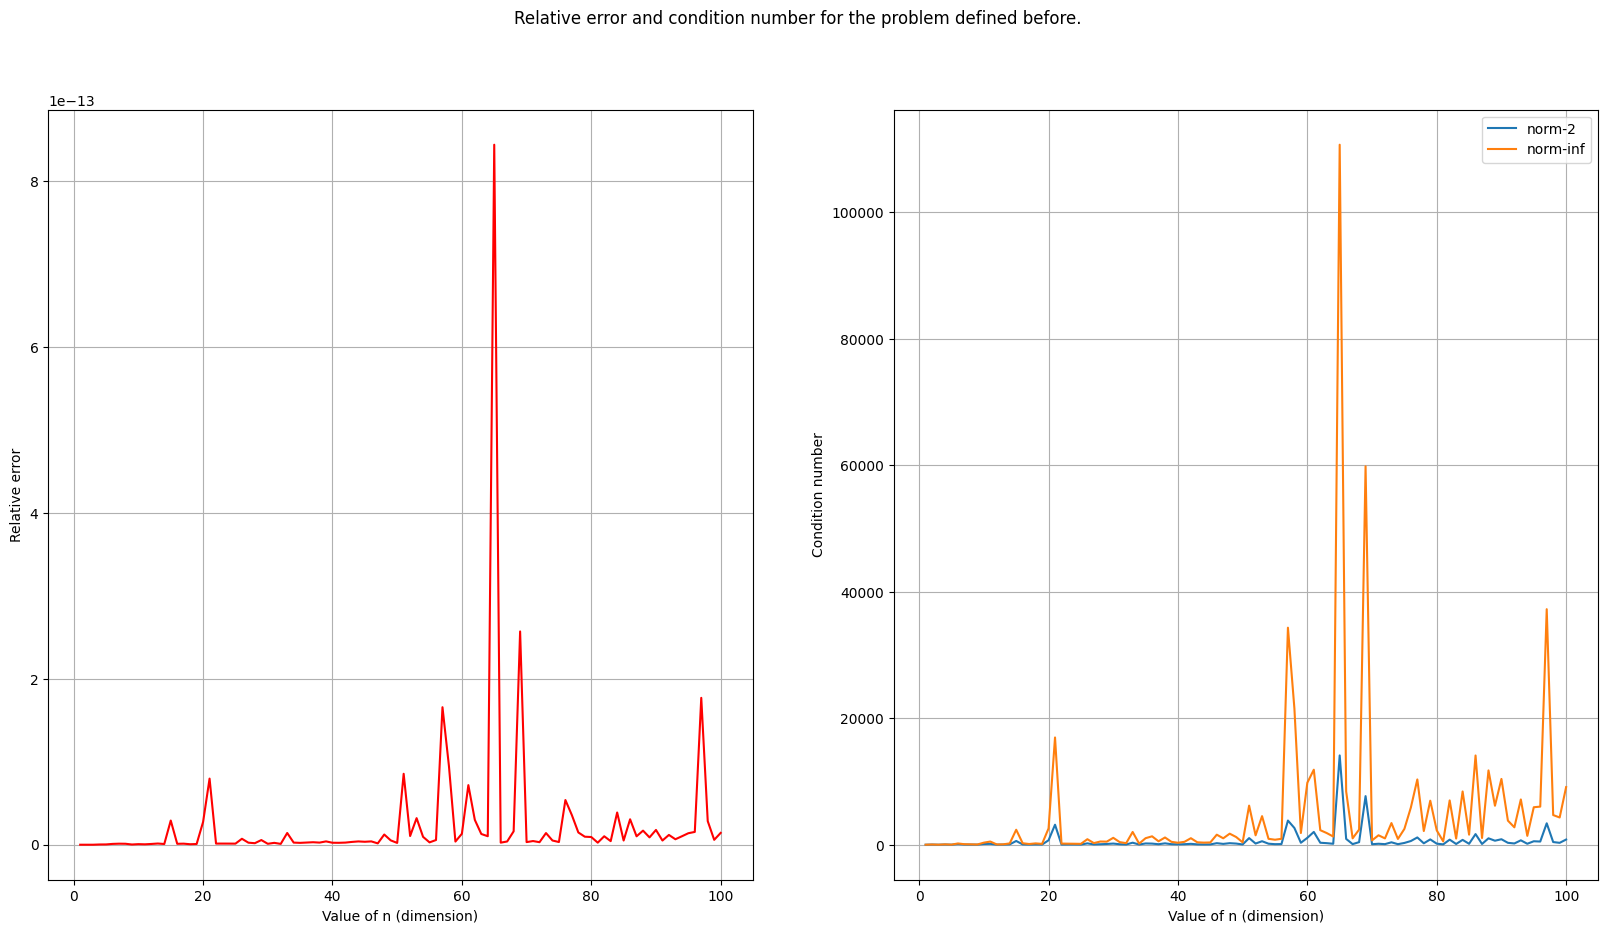

In [30]:
N = 100

array_err = []
array_2 = []
array_inf = []

x_plot = np.linspace(1,100,N)

for n in range(1,N+1):
  A = np.random.randn(n,n)
  xtrue = np.ones(n)
  b = np.dot(A,xtrue)
  x = np.linalg.solve(A,b)
  absolute_err = np.linalg.norm(xtrue - x, 2)
  relative_err = absolute_err / np.linalg.norm(xtrue, 2)

  cond2 = np.linalg.cond(A,2)
  cond_inf = np.linalg.cond(A,np.inf)

  array_err.append(relative_err)
  array_2.append(cond2)
  array_inf.append(cond_inf)


plt.figure(figsize=(20,10))
plt.suptitle("Relative error and condition number for the problem defined before.")
plt.subplot(1,2,1)
plt.plot(x_plot, array_err, color="red")
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Relative error")

plt.subplot(1,2,2)
plt.plot(x_plot, array_2)
plt.plot(x_plot, array_inf)
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Condition number")
plt.legend(["norm-2", "norm-inf"])

plt.show()





**Esercizio 2**
Test the program above with the following choices of A ∈ R
n×n:

• A random matrix (created with the function np.random.rand()) with size varying with n =
{10, 20, 30, . . . , 100}.

• The Vandermonde matrix (np.vander) of dimension n = {5, 10, 15, 20, 25, 30} with respect to the
vector x = {1, 2, 3, . . . , n}.

• The Hilbert matrix (scipy.linalg.hilbert) of dimension n = {4, 5, 6, . . . , 12}

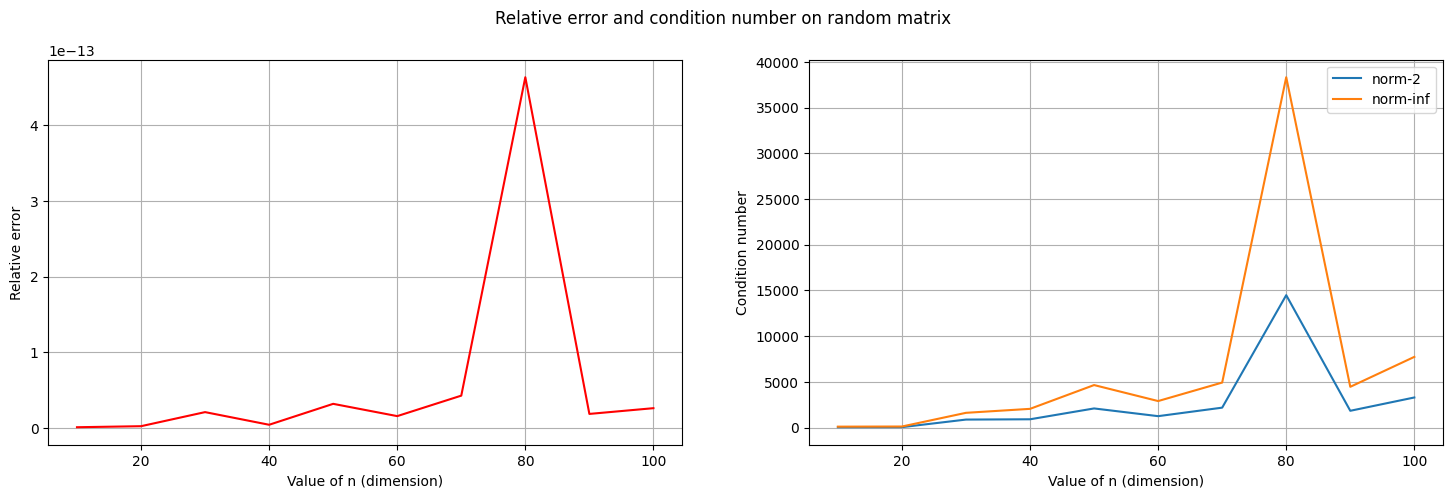

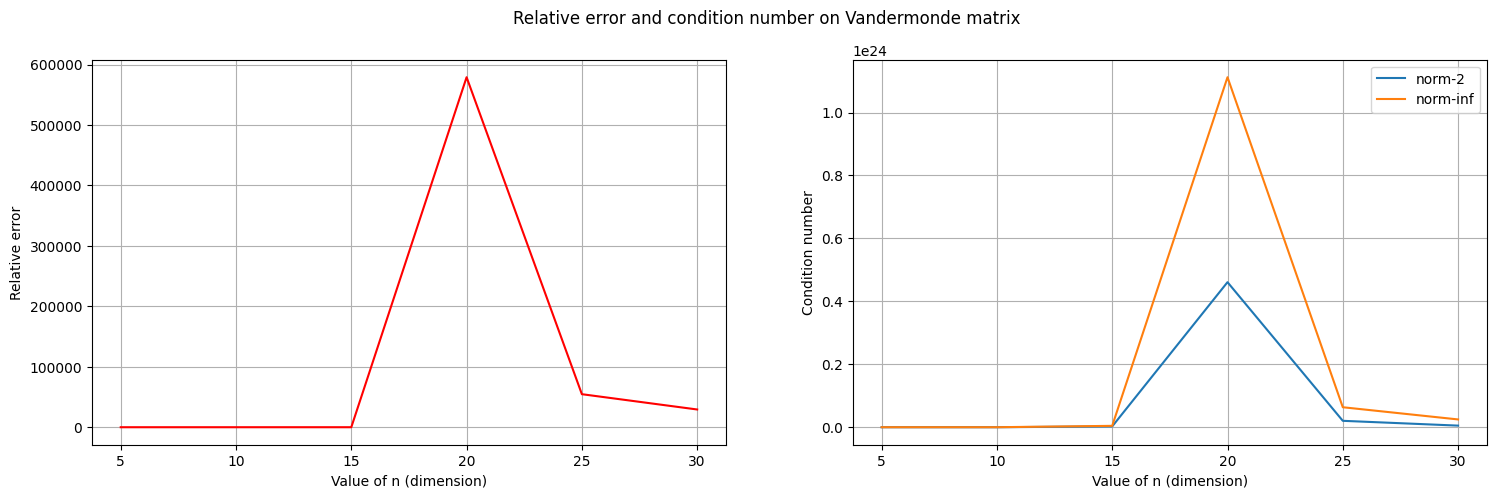

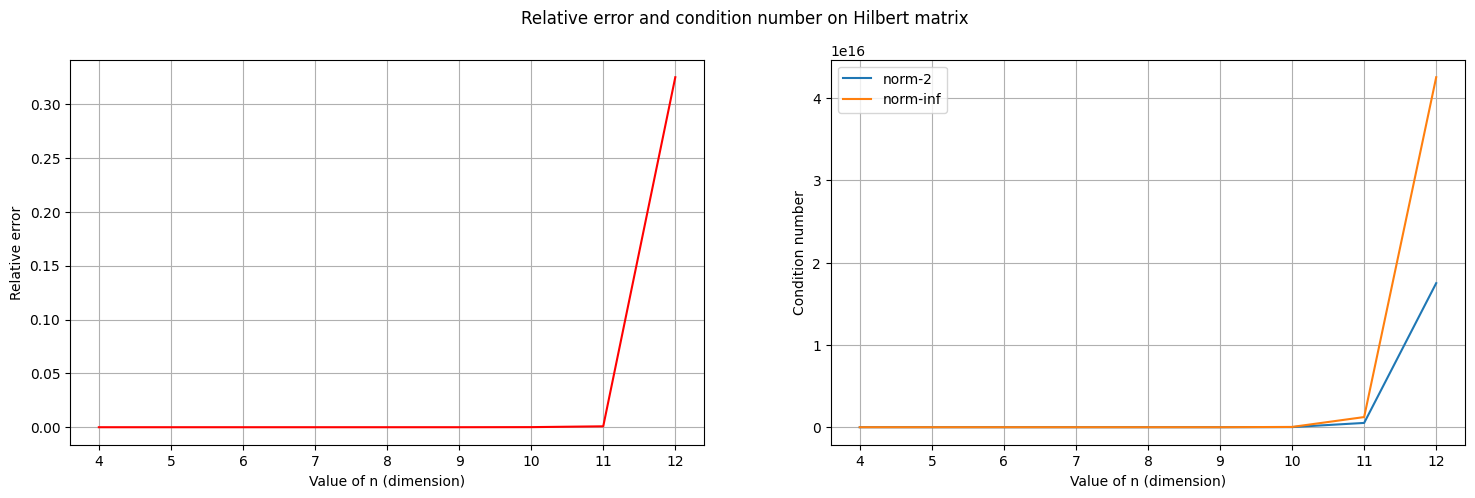

In [31]:
N = 10

array_err = []
array_2 = []
array_inf = []

x_plot = np.arange(10,101,N)

for n in range(10,101,N):
  A = np.random.rand(n,n)
  xtrue = np.ones(n)
  b = np.dot(A,xtrue)
  x = np.linalg.solve(A,b)
  absolute_err = np.linalg.norm(xtrue - x, 2)
  relative_err = absolute_err / np.linalg.norm(xtrue, 2)

  cond2 = np.linalg.cond(A,2)
  cond_inf = np.linalg.cond(A,np.inf)

  array_err.append(relative_err)
  array_2.append(cond2)
  array_inf.append(cond_inf)


plt.figure(figsize=(18,5))
plt.suptitle("Relative error and condition number on random matrix")
plt.subplot(1,2,1)
plt.plot(x_plot, array_err, color="red")
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Relative error")

plt.subplot(1,2,2)
plt.plot(x_plot, array_2)
plt.plot(x_plot, array_inf)
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Condition number")
plt.legend(["norm-2", "norm-inf"])

plt.show()

#############################################################################################


array_err = []
array_2 = []
array_inf = []

x_plot = np.arange(5,31,5)

for n in range(5,31,5):
  x_vand = np.arange(1,n+1,1)
  A = np.vander(x_vand,n)
  xtrue = np.ones(n)
  b = np.dot(A,xtrue)
  x = np.linalg.solve(A,b)
  absolute_err = np.linalg.norm(xtrue - x, 2)
  relative_err = absolute_err / np.linalg.norm(xtrue, 2)

  cond2 = np.linalg.cond(A,2)
  cond_inf = np.linalg.cond(A,np.inf)

  array_err.append(relative_err)
  array_2.append(cond2)
  array_inf.append(cond_inf)


plt.figure(figsize=(18,5))
plt.suptitle("Relative error and condition number on Vandermonde matrix")
plt.subplot(1,2,1)
plt.plot(x_plot, array_err, color="red")
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Relative error")

plt.subplot(1,2,2)
plt.plot(x_plot, array_2)
plt.plot(x_plot, array_inf)
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Condition number")
plt.legend(["norm-2", "norm-inf"])

plt.show()

#############################################################################################

array_err = []
array_2 = []
array_inf = []

x_plot = np.arange(4,13,1)

for n in range(4,13,1):
  A = ln.hilbert(n)
  xtrue = np.ones(n)
  b = np.dot(A,xtrue)
  x = np.linalg.solve(A,b)
  absolute_err = np.linalg.norm(xtrue - x, 2)
  relative_err = absolute_err / np.linalg.norm(xtrue, 2)

  cond2 = np.linalg.cond(A,2)
  cond_inf = np.linalg.cond(A,np.inf)

  array_err.append(relative_err)
  array_2.append(cond2)
  array_inf.append(cond_inf)

plt.figure(figsize=(18,5))
plt.suptitle("Relative error and condition number on Hilbert matrix")
plt.subplot(1,2,1)
plt.plot(x_plot, array_err, color="red")
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Relative error")

plt.subplot(1,2,2)
plt.plot(x_plot, array_2)
plt.plot(x_plot, array_inf)
plt.grid()
plt.xlabel("Value of n (dimension)")
plt.ylabel("Condition number")
plt.legend(["norm-2", "norm-inf"])

plt.show()


# **Floating Point Arithmetic**

**Esercizio 1**
The Machine epsilon eps is the distance between 1 and the next floating point number. Compute eps, which
is defined as the smallest floating point number such that it holds:

fl(1 + eps) > 1

Tips: use a while structure

In [32]:
eps = 1
oldeps = 1
while(1+eps > 1):
  oldeps = eps
  eps = eps / 2

print("Calculated: ",oldeps)
print("True value: ",np.finfo(float).eps)

Calculated:  2.220446049250313e-16
True value:  2.220446049250313e-16


**Esercizio 2**
 Let’s consider the sequence an = (1 + 1
n
)
n. It is well known that:

limn→∞
an = e

where e is the Euler costant. Choose different values for n, compute an and compare it to the real
value of the Euler costant. What happens if you choose a large value of n? Guess the reason.

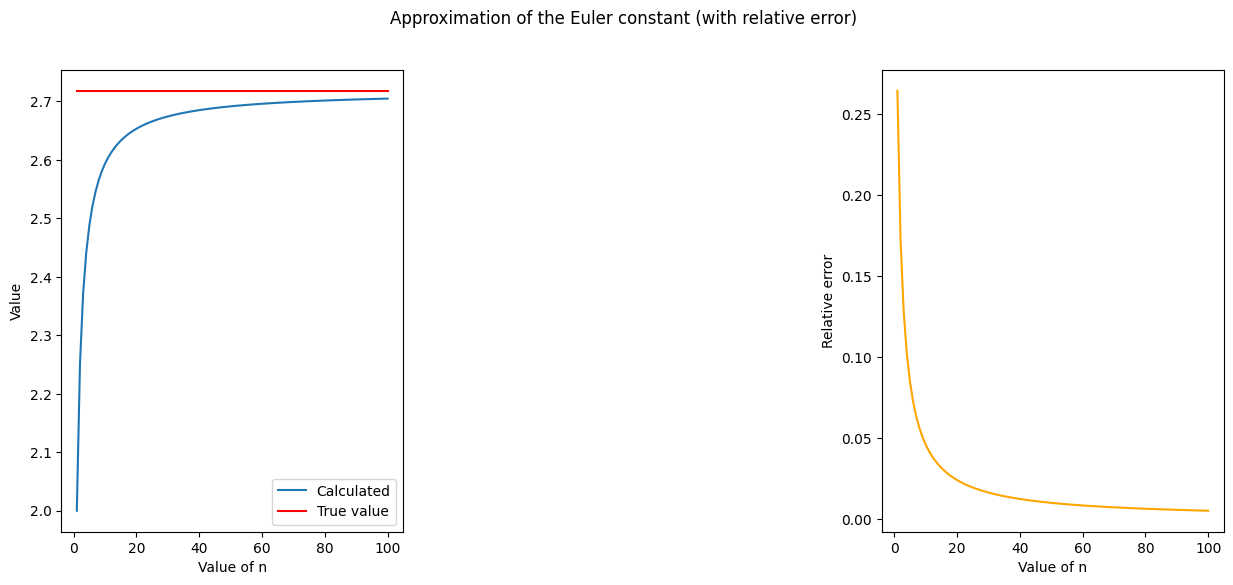

In [33]:
x_plot = np.arange(1,101,1)
y = []
rel_err = []

for n in range(1,101,1):
  y.append((1 + 1/n)**n)
  rel_err.append(abs((np.e-(1 + 1/n)**n))/np.e)


plt.figure(figsize=(15,6))
plt.suptitle("Approximation of the Euler constant (with relative error)")
plt.subplot(1,3,1)
plt.plot(x_plot,y)
plt.plot(x_plot,[np.e]*100,"red")
plt.legend(["Calculated","True value"])
plt.ylabel("Value")
plt.xlabel("Value of n")

plt.subplot(1,3,3)
plt.plot(x_plot,rel_err,"orange")
plt.ylabel("Relative error")
plt.xlabel("Value of n")

plt.show()




**Esercizio 3**
 Let’s consider the matrices:

A =
[[4,2],
[1,3]]

B =[[
4,2],[
2,1]]

Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer
some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate
your deduction with other examples.
Tips: Please, have a look at np.linalg.

In [34]:
A = np.array([[4,2], [1,3]])
B = np.array([[ 4,2],[ 2,1]])

print("Rank of A: ",np.linalg.matrix_rank(A))

print("Eigenvalues of A: ", np.linalg.eigvals(A))

print("Rank of B: ",np.linalg.matrix_rank(B))

print("Eigenvalues of B: ", np.linalg.eigvals(B))

print()
print("This is because the rank of a square matrix can be defined as being the number of non-zero eigenvalues of the matrix (with repetitions)")
print("Another example of this is given by the following matrix:")
print()

C = np.array([[0,0], [0,0]])

print("C: [ 0, 0 ] ")
print("   [ 0, 0 ]")
print()
print("Rank of C: ",np.linalg.matrix_rank(C))

print("Eigenvalues of C: ", np.linalg.eigvals(C))
print("Where the eigenvectors are: \n", np.linalg.eig(C)[1])

Rank of A:  2
Eigenvalues of A:  [5. 2.]
Rank of B:  1
Eigenvalues of B:  [5. 0.]

This is because the rank of a square matrix can be defined as being the number of non-zero eigenvalues of the matrix (with repetitions)
Another example of this is given by the following matrix:

C: [ 0, 0 ] 
   [ 0, 0 ]

Rank of C:  0
Eigenvalues of C:  [0. 0.]
Where the eigenvectors are: 
 [[1. 0.]
 [0. 1.]]
